### Cell proportion analysis

- There may be several arguments for using cell proportion over cell density: 
    - We can cross check with literature, as they generally quote proportion
    - Less noisy? less determined by potential brain tissue shrinkage from tissue preparation? 
- Here, we will also look at GNR as a simple measurement.

In [1]:
import sys
sys.path.insert(0,
                '/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Cell_pipeline/Cell_quantification/')
from helper_functions import *
from plotting import *
import pandas as pd

In [2]:
# import plotting functions
import seaborn as sns

**Read in data**

In [3]:
cortical = pd.read_csv('C:/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Cell_pipeline/Cell_quantification/Data/cell_counts_cortical.txt',sep='\t')
occipital = pd.read_csv('C:/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Cell_pipeline/Cell_quantification/Data/cell_counts_occipital.txt',sep='\t')
bg = pd.read_csv('C:/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Cell_pipeline/Cell_quantification/Data/cell_counts_BG.txt',sep='\t')

In [4]:
# combine data from different brain regions
data = pd.concat([cortical,
                  occipital,
                  bg])

**Read in more meta data about PSP stage**

In [5]:
# meta data (1): region name, PSP stage
metadata_taupipeline = pd.read_csv('/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Metadata/PSP_tau_classification_MAY2023.txt',
                    sep = '\t')
metadata = metadata_taupipeline[['PSP Stage','Patient_ID','Slice_ID','region_name','Diagnosis']]

In [6]:
print(metadata.shape)
metadata.head()

(304, 5)


,PSP Stage,Patient_ID,Slice_ID,region_name,Diagnosis
0,2_01,NP19-00221,S747324,frontal,PSP
1,2_01,NP19-00221,S747390,occipital,PSP
2,2_01,NP19-00221,S760051,frontal,PSP
3,2_01,NP19-00221,S760052,temporal,PSP
4,2_01,NP19-00221,S760053,parietal,PSP


In [7]:
# metadata (2): semi-quantitative info
semi_quan = pd.read_csv('/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Metadata/Pathology_assessment_and_demography.csv',sep=',')
semi_quan.head()

,REDCap ID,Patient_ID,JR Number,JR,GP_SK,STN_SK,STR_SK,FCF_SK,DE_SK,OC_SK,...,Age at Death,disease duration (years),MDS_first,MDS-PSP last visit,years PSPRS and death,years ACER and death,PSPRS Total (last assesment),ACE-R last assesment,imputed ACER at average,imputed PSPRS at death_average
0,636.0,NP19-00221,133.0,JR133,2.0,2.0,2.0,0.0,1.0,0.0,...,76.4,8.750000,prob. PSP-RS,prob. PSP-RS,0.32,0.32,63.0,94.0,86.20,62.60
1,3088.0,NP20-00012,139.0,JR139,3.0,3.0,2.0,0.0,1.0,0.0,...,75.2,4.619178,poss. PSP-PGF,poss. PSP-PGF,0.52,0.52,26.0,97.0,93.49,28.18
2,138.0,NP17-00242,94.0,JR94,2.0,2.0,2.0,1.0,1.0,0.0,...,55.0,5.500000,prob. PSP-RS,prob. PSP-RS,0.41,0.41,53.0,77.0,78.14,52.73
3,2437.0,NP18-00007,99.0,JR99,2.0,2.0,2.0,1.0,1.0,0.0,...,74.5,6.000000,prob. PSP-RS,prob. PSP-RS,0.67,0.67,45.0,79.0,75.23,55.98
4,453.0,NP18-00004,98.0,JR98,2.0,2.0,2.0,1.0,1.0,0.0,...,84.7,5.580000,prob. PSP-RS,prob. PSP-RS,1.25,1.25,59.0,66.0,71.44,58.97


In [8]:
# Merge the two metadata(s) together
meta = metadata.merge(semi_quan,on=['Patient_ID'])
print(meta.shape)
meta.head()

(304, 26)


,PSP Stage,Patient_ID,Slice_ID,region_name,Diagnosis,REDCap ID,JR Number,JR,GP_SK,STN_SK,...,Age at Death,disease duration (years),MDS_first,MDS-PSP last visit,years PSPRS and death,years ACER and death,PSPRS Total (last assesment),ACE-R last assesment,imputed ACER at average,imputed PSPRS at death_average
0,2_01,NP19-00221,S747324,frontal,PSP,636.0,133.0,JR133,2.0,2.0,...,76.4,8.75,prob. PSP-RS,prob. PSP-RS,0.32,0.32,63.0,94.0,86.2,62.6
1,2_01,NP19-00221,S747390,occipital,PSP,636.0,133.0,JR133,2.0,2.0,...,76.4,8.75,prob. PSP-RS,prob. PSP-RS,0.32,0.32,63.0,94.0,86.2,62.6
2,2_01,NP19-00221,S760051,frontal,PSP,636.0,133.0,JR133,2.0,2.0,...,76.4,8.75,prob. PSP-RS,prob. PSP-RS,0.32,0.32,63.0,94.0,86.2,62.6
3,2_01,NP19-00221,S760052,temporal,PSP,636.0,133.0,JR133,2.0,2.0,...,76.4,8.75,prob. PSP-RS,prob. PSP-RS,0.32,0.32,63.0,94.0,86.2,62.6
4,2_01,NP19-00221,S760053,parietal,PSP,636.0,133.0,JR133,2.0,2.0,...,76.4,8.75,prob. PSP-RS,prob. PSP-RS,0.32,0.32,63.0,94.0,86.2,62.6


**Merge cell density info with metadata**

In [9]:
# check cell density df shape
print('cell info df shape:', data.shape)

# Change image_name column to slice ID
data = data.copy()
data.loc[:,'Slice_ID'] = ['S'+i[0:6] for i in data['Image_name']]

# check meta data df shape
print('meta shape: ', meta.shape)

# Merge them & check shape
data1_ = data.merge(meta,on=['Slice_ID','Patient_ID','region_name','Diagnosis'],how='left')
print('data1_ shape: ', data1_.shape)

cell info df shape: (346, 20)
meta shape:  (304, 26)
data1_ shape:  (346, 43)


In [10]:
data1_['Diagnosis'].value_counts()

PSP        316
Control     30
Name: Diagnosis, dtype: int64

### Let's do some plotting: cell proportion check 

In [11]:
# Calculate extra metrics 
data1 = cell_proportion_extra(data1_)

[Text(0.5, 0, 'Cell proportion'), Text(0, 0.5, 'Brain region')]

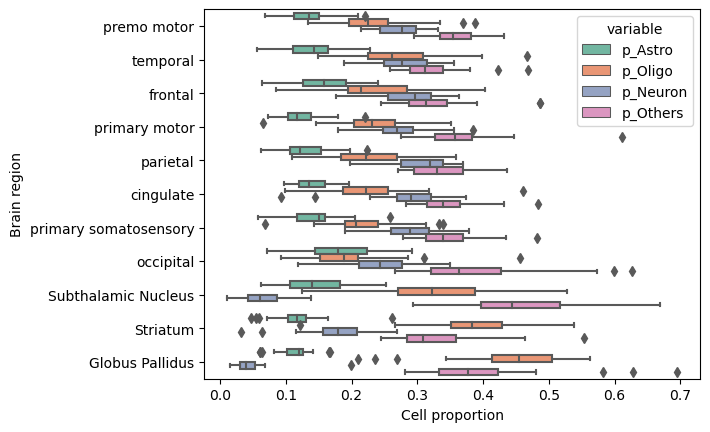

In [12]:
data1_subset = data1[['Image_name','p_Astro','p_Oligo','p_Neuron','p_Others','region_name']]
data1_subset_melt = data1_subset.melt(id_vars=['Image_name','region_name'],value_vars=['p_Astro','p_Oligo','p_Neuron','p_Others'])

# Cell density (PSP & control combined)
ax = sns.boxplot(data1_subset_melt,
                 y='region_name',
                 x='value',
                 hue='variable',
                 palette='Set2')
ax.set(xlabel='Cell proportion',
       ylabel='Brain region')

But, it's quite messy with 'Others' cell type

**So, now we plot proportion of each cell type / key cells** 

[Text(0.5, 0, 'Cell proportion'), Text(0, 0.5, 'Brain region')]

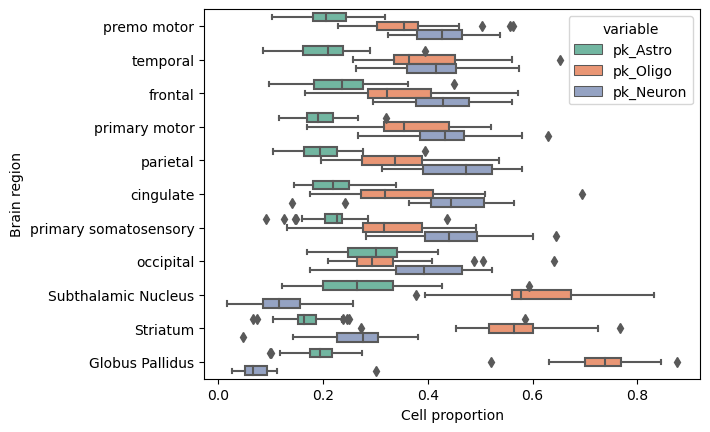

In [13]:
data1_subset = data1[['Image_name','pk_Astro','pk_Oligo','pk_Neuron','region_name']]
data1_subset_melt = data1_subset.melt(id_vars=['Image_name','region_name'],value_vars=['pk_Astro','pk_Oligo','pk_Neuron'])

# Cell density (PSP & control combined): pk_astro = no. of astrocyte / no. of hallmark cells 
ax = sns.boxplot(data1_subset_melt,
                 y='region_name',
                 x='value',
                 hue='variable',
                 palette='Set2')
ax.set(xlabel='Cell proportion',
       ylabel='Brain region')

- This plot tells us the relative proportion of each key cell of interest. 
- The order (max to min): neurons > oligo > astrocytes (in cortical regions)
- The order (max to min): oligo > astro > neuron (BG, but quite mixed)

### Let's check GNR

In [14]:
cortical_regions = ['primary motor',
                    'cingulate',
                    'occipital',
                    'primary somatosensory',
                    'temporal',
                    'premo motor',
                    'frontal',
                    'parietal']

[Text(0.5, 0, 'Glia:neuron ratio'), Text(0, 0.5, 'Brain region')]

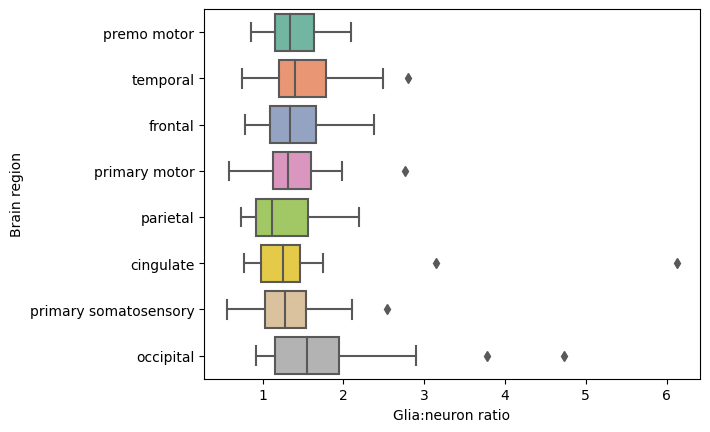

In [15]:
# Check GNR in cortical regions
data1_cortex = data1[data1['region_name'].isin(cortical_regions)]
ax = sns.boxplot(data1_cortex,
                 y='region_name',
                 x='GNR',
                 palette='Set2')
ax.set(xlabel='Glia:neuron ratio',
       ylabel='Brain region')

[Text(0.5, 0, 'Glia:neuron ratio'), Text(0, 0.5, 'Brain region')]

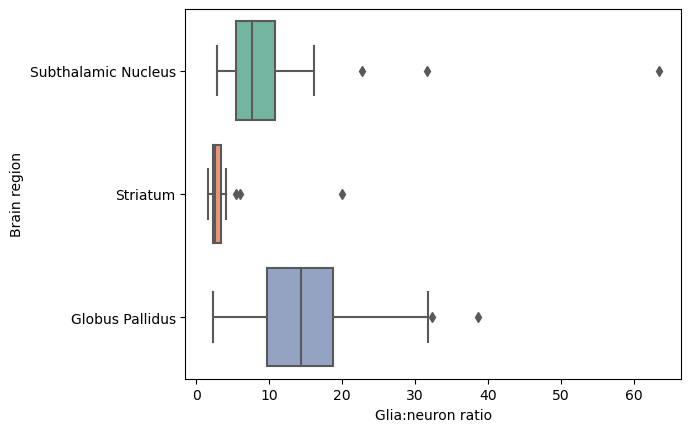

In [16]:
# Check GNR in cortical regions
data1_subcortex = data1[ ~data1['region_name'].isin(cortical_regions)]
ax = sns.boxplot(data1_subcortex,
                 y='region_name',
                 x='GNR',
                 palette='Set2')
ax.set(xlabel='Glia:neuron ratio',
       ylabel='Brain region')

### Let's do some plotting: Control vs PSP

**1) Cell type-specific proportion in each brain region**

In [17]:
# See which regions controls have: 
print('regions that controls have:',set(data1[data1['Diagnosis']=='Control']['region_name']))
print('unique no. of controls: ',len(list(set(data1[data1['Diagnosis']=='Control']['Patient_ID']))))

regions that controls have: {'cingulate', 'occipital', 'Subthalamic Nucleus', 'Globus Pallidus', 'parietal', 'Striatum', 'frontal', 'temporal'}
unique no. of controls:  9


In [18]:
# First, subset data to only contain regions that controls have:

regions_controls_have = list(set(data1[data1['Diagnosis']=='Control']['region_name']))
data2 = data1[data1['region_name'].isin(regions_controls_have)]

data2_subset = data2[['Image_name','pk_Astro','pk_Oligo','pk_Neuron','p_hallmark',
                      'pk_Astro+','pk_Oligo+','pk_Neuron+','p_hallmark+',
                      'Diagnosis','region_name']]

[Text(0.5, 0, 'Hallmark proportion'), Text(0, 0.5, 'Brain region')]

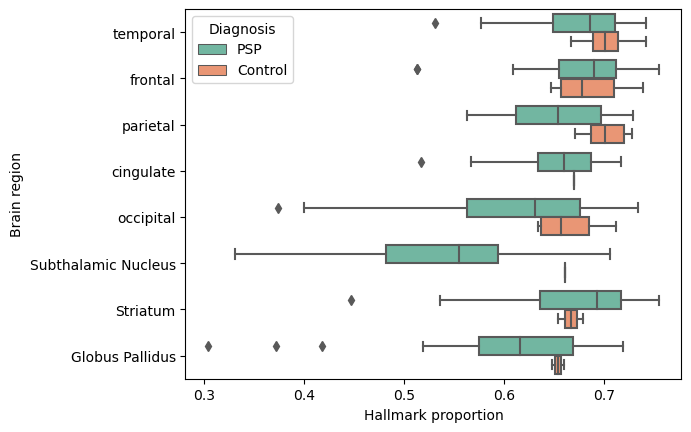

In [19]:
# hallmark proportion in control vs PSP (proportion of A,O,N as compared to all cells detected)
ax = sns.boxplot(data2_subset,
                 y='region_name',
                 x='p_hallmark',
                 hue='Diagnosis',
                 palette='Set2')
ax.set(xlabel='Hallmark proportion',
       ylabel='Brain region')

[Text(0.5, 0, 'Neuronal proportion from key cells'),
 Text(0, 0.5, 'Brain region')]

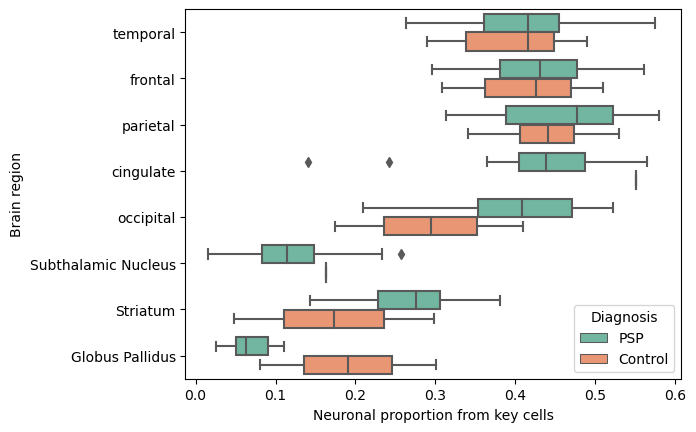

In [20]:
# Neuronal proportion from key cells -> can we use this to infer neuronal loss? I think cell density is probably better (less contamination from A & O changing too)
ax = sns.boxplot(data2_subset,
                 y='region_name',
                 x='pk_Neuron',
                 hue='Diagnosis',
                 palette='Set2')
ax.set(xlabel='Neuronal proportion from key cells',
       ylabel='Brain region')

[Text(0.5, 0, 'Tau positive neuronal proportion from key cells'),
 Text(0, 0.5, 'Brain region')]

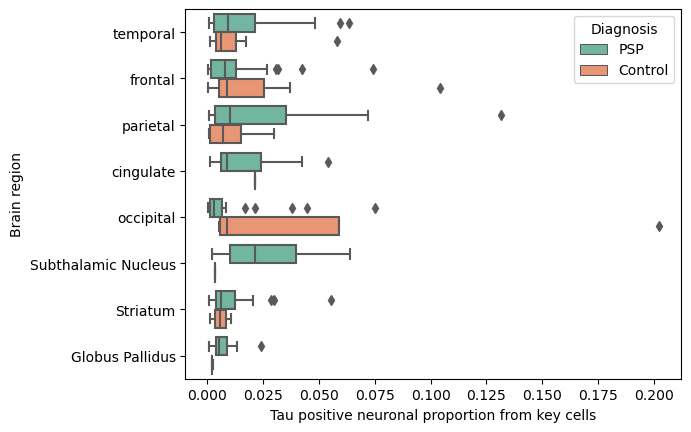

In [22]:
# Neuronal proportion from key cells -> can we use this to infer neuronal loss? I think cell density is probably better (less contamination from A & O changing too)
ax = sns.boxplot(data2_subset,
                 y='region_name',
                 x='pk_Neuron+',
                 hue='Diagnosis',
                 palette='Set2')
ax.set(xlabel='Tau positive neuronal proportion from key cells',
       ylabel='Brain region')

- From looking at these plots, I think using cell proportion to compare between PSP & controls doesn't make much sense.
- Cell density directly is a better indicator of cell loss (from thinking about what proportion & density mean)

### Let's only look at PSP subjects

In [24]:
psp_only = data1[data1['Diagnosis']=='PSP']
psp_only_stage = psp_only[~psp_only['Stage_SK'].isna()]

1. For PSP only, cell proportion per region

[Text(0.5, 0, 'Cell proportion'), Text(0, 0.5, 'Brain region')]

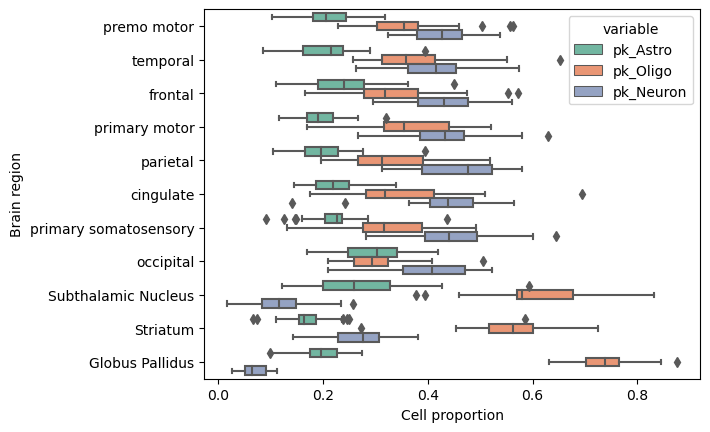

In [25]:
psp_only_subset = psp_only[['Image_name','pk_Astro','pk_Oligo','pk_Neuron','region_name']]
psp_only_subset_melt = psp_only_subset.melt(id_vars=['Image_name','region_name'],value_vars=['pk_Astro','pk_Oligo','pk_Neuron'])

# Cell density (PSP only)
ax = sns.boxplot(psp_only_subset_melt,
                 y='region_name',
                 x='value',
                 hue='variable',
                 palette='Set2')
ax.set(xlabel='Cell proportion',
       ylabel='Brain region')

2) Tau positive proportion plot per region

[Text(0.5, 0, 'Tau positive cell proportion from key cells'),
 Text(0, 0.5, 'Brain region')]

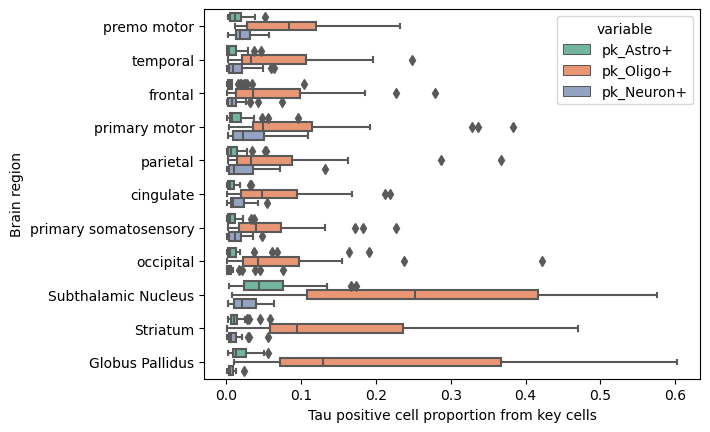

In [26]:
psp_only_subset = psp_only[['Image_name','pk_Astro+','pk_Oligo+','pk_Neuron+','region_name']]
psp_only_subset_melt = psp_only_subset.melt(id_vars=['Image_name','region_name'],value_vars=['pk_Astro+','pk_Oligo+','pk_Neuron+'])

# Cell density (PSP only)
ax = sns.boxplot(psp_only_subset_melt,
                 y='region_name',
                 x='value',
                 hue='variable',
                 palette='Set2')
ax.set(xlabel='Tau positive cell proportion from key cells',
       ylabel='Brain region')

**3. Cell proportion, tau positive proportion per PSP stage & region**

In [27]:
region_code = {'Subthalamic nucleus':'Subthalamic nucleus',
                    'Globus pallidus':'Globus pallidus',
                    'Striatum':'Striatum',
                    'frontal':'Pre-frontal',
                    'premo motor':'Pre-motor',
                    'primary motor':'Primary motor',
                    'primary somatosensory':'Primary somatosensory',
                    'temporal':'Temporal',
                    'parietal':'Parietal',
                    'occipital':'Occipital',
                    'cingulate':'Cingulate'}

In [33]:
# format region name 
psp_only_stage_formatted = psp_only_stage.copy()
psp_only_stage_formatted_cortex = psp_only_stage_formatted[psp_only_stage_formatted['region_name'].isin(cortical_regions)]


**Cell propotion across PSP stage** I think its important to look at cortical, subcortical separately

[Text(0.5, 24.0, 'Neuronal proportion from key cells'),
 Text(24.000000000000014, 0.5, 'Brain region')]

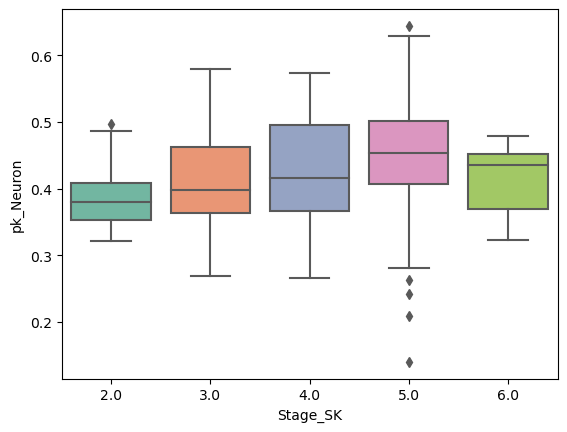

In [34]:
# Neuronal density (PSP only) per stage across all regions
sns.boxplot(psp_only_stage_formatted_cortex,
                 y='pk_Neuron',
                 x='Stage_SK',
                 palette='Set2')
ax.set(xlabel='Neuronal proportion from key cells',
       ylabel='Brain region')

- We plot this, anticipating a neuronal loss (lower proportion? if we expect A to increase, O to stay constant)



[Text(0.5, 24.0, 'Astrocytic proportion from key cells'),
 Text(24.000000000000014, 0.5, 'Brain region')]

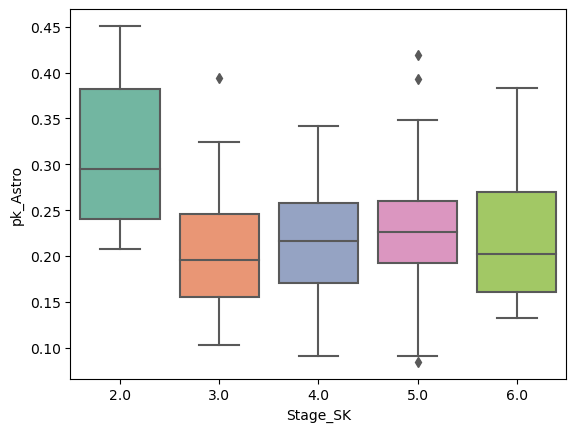

In [35]:
# Astro proportion (PSP only) per stage across all regions
sns.boxplot(psp_only_stage_formatted_cortex,
                 y='pk_Astro',
                 x='Stage_SK',
                 palette='Set2')
ax.set(xlabel='Astrocytic proportion from key cells',
       ylabel='Brain region')

Hm... we definitely expect astro no. to increase, this may indicate mis-classification of A as N or even O?

[Text(0.5, 24.0, 'Oligodendroglial proportion from key cells'),
 Text(24.000000000000014, 0.5, 'Brain region')]

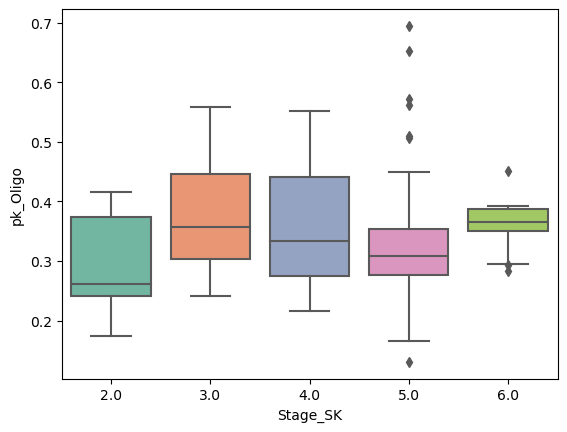

In [36]:
# Oligo proportion (PSP only) per stage across all regions
sns.boxplot(psp_only_stage_formatted_cortex,
                 y='pk_Oligo',
                 x='Stage_SK',
                 palette='Set2')
ax.set(xlabel='Oligodendroglial proportion from key cells',
       ylabel='Brain region')

- This, unsure how to interpret

<Axes: xlabel='pk_Neuron', ylabel='region_name'>

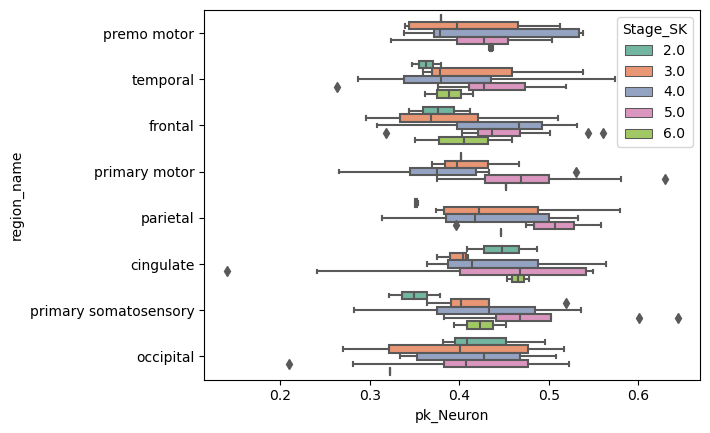

In [37]:
# Cell density (PSP only) per stage & region
sns.boxplot(psp_only_stage_formatted,
                 y='region_name',
                 x='pk_Neuron',
                 hue='Stage_SK',
                 palette='Set2')
# ax.set(xlabel='Neuronal density',
#        ylabel='Brain region')

- This plot makes it more obvious than lower PSP stages have lesser neuronal density than later PSP stage
- This also makes me wonder if we should use 'cell proportion' over 'cell density' - potentially to do with brain slice shrinkage?

**Tau positive cell density**

[Text(0.5, 24.0, 'Tau positive proportion'),
 Text(24.000000000000014, 0.5, 'Brain region')]

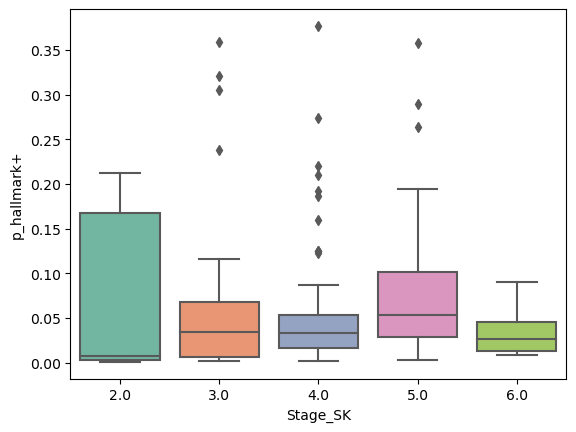

In [38]:
# tau positive density (PSP only) per stage across all regions
sns.boxplot(psp_only_stage_formatted_cortex,
                 y='p_hallmark+',
                 x='Stage_SK',
                 palette='Set2')
ax.set(xlabel='Tau positive proportion',
       ylabel='Brain region')

[Text(0.5, 24.0, 'Tau positive astrocytic proportion'),
 Text(24.000000000000014, 0.5, 'Brain region')]

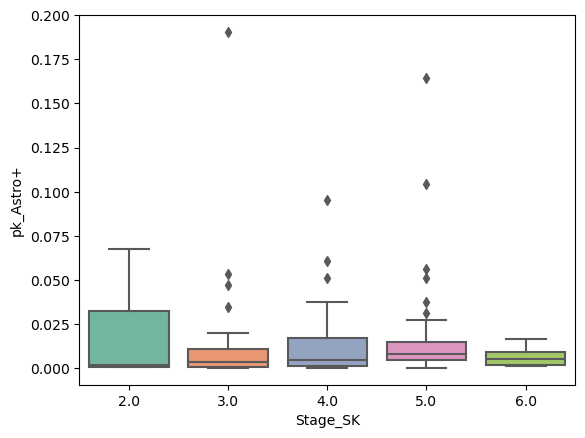

In [39]:
# tau positive density (PSP only) per stage across all regions
sns.boxplot(psp_only_stage_formatted_cortex,
                 y='pk_Astro+',
                 x='Stage_SK',
                 palette='Set2')
ax.set(xlabel='Tau positive astrocytic proportion',
       ylabel='Brain region')

<Axes: xlabel='p_hallmark+', ylabel='region_name'>

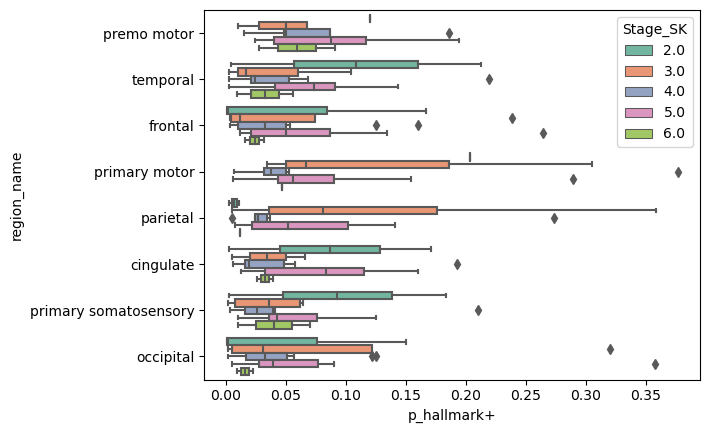

In [42]:
# Cell density (PSP only) per stage & region
sns.boxplot(psp_only_stage_formatted,
                 y='region_name',
                 x='p_hallmark+',
                 hue='Stage_SK',
                 palette='Set2')

- Overall, from inspecting the plots: 
    - we will only use cell proportion/density information
    - GNR
    - BUT not tau positive proportions, they don't make sense